# Figures

This notebooks focus on reproducing figure 1 of the paper "Deep learning the collisional cross sections of the peptide universe from a million experimental values "

## Preliminars

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.insert(1, '../code')

In [4]:
import utils

In [5]:
df = pd.read_csv('SourceData_Figure_1.csv')

## Figure 1 e

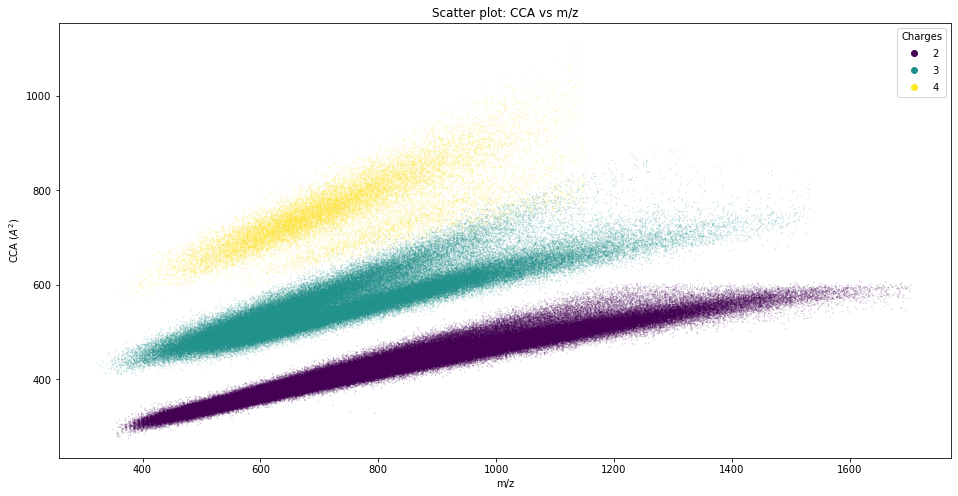

In [6]:
fig = plt.gcf()
fig.set_size_inches((16, 8))
scatter = plt.scatter(df['m/z'], df['CCS'], c = df['Charge'], s = 0.01)
plt.xlabel('m/z')
plt.ylabel(r'CCA ($A^2$)')
plt.title('Scatter plot: CCA vs m/z')
plt.legend(*scatter.legend_elements(), title = 'Charges')

## Supplementary Figure 2
Distribution of tryptic peptides in the m/z vs CCS space. Fitted power Law(A*x^b). Residual histograms are also plotted

In [7]:
df_tryp = df[df['Experiment'].apply(lambda x : x.find('_Tr') != -1 or x.find('_tr') != -1)]

In [8]:
f"There is approximately {np.round(df_tryp.shape[0]/df.shape[0], 3)*100}% of tryptic peptides"

'There is approximately 62.7% of tryptic peptides'

In [9]:
f = lambda x, A, b: A*x**b 

In [10]:
x_ch2 = df_tryp['m/z'].values
y_ch2 = df_tryp['CCS'].values
(A_ch1, b_ch1), cov_ch1 = scipy.optimize.curve_fit(f, x_ch2, y_ch2)

In [11]:
df_tryp_ch2 = df_tryp[df_tryp['Charge']==2]
df_tryp_ch3 = df_tryp[df_tryp['Charge']==3]
df_tryp_ch4 = df_tryp[df_tryp['Charge']==4]

In [12]:
popt_2, _ = scipy.optimize.curve_fit(f, df_tryp_ch2['m/z'], df_tryp_ch2['CCS'])
popt_3, _ = scipy.optimize.curve_fit(f, df_tryp_ch3['m/z'], df_tryp_ch3['CCS'])
popt_4, _ = scipy.optimize.curve_fit(f, df_tryp_ch4['m/z'], df_tryp_ch4['CCS'])

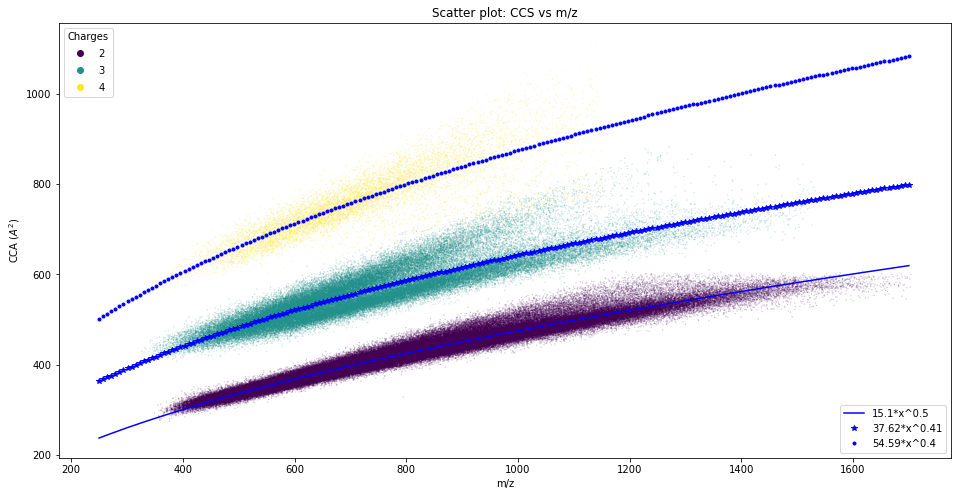

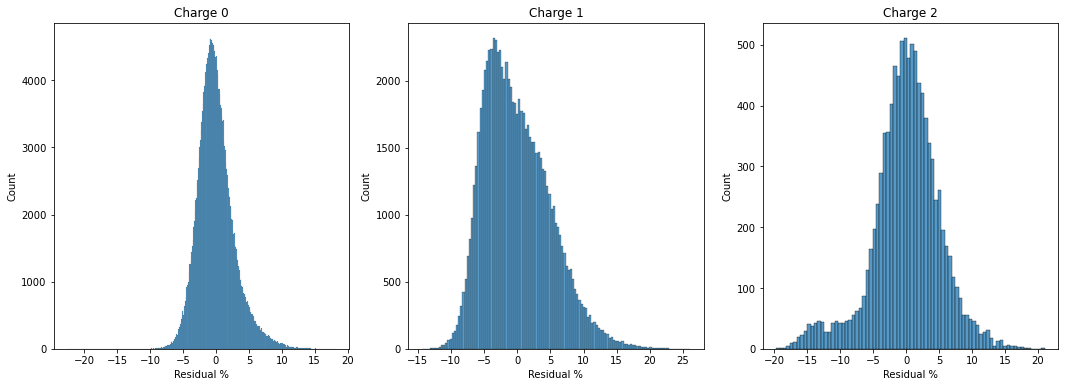

In [13]:
x_plot = np.linspace(250, 1700, 200)
fig = plt.gcf()
fig.set_size_inches((16, 8))
scatter = plt.scatter(df_tryp['m/z'], df_tryp['CCS'], c = df_tryp['Charge'], s = 0.01)
power2, = plt.plot(x_plot, f(x_plot, popt_2[0], popt_2[1]) , 'b-', label = 'fit charge 2')
power3, = plt.plot(x_plot, f(x_plot, popt_3[0], popt_3[1]) , 'b*', label = 'fit charge 3')
power4, = plt.plot(x_plot, f(x_plot, popt_4[0], popt_4[1]) , 'b.', label = 'fit charge 4')
plt.xlabel('m/z')
plt.ylabel(r'CCA ($A^2$)')
plt.title('Scatter plot: CCS vs m/z')
legend1 = plt.legend(*scatter.legend_elements(), title = 'Charges')
legend2 = plt.legend([power2, power3, power4], 
[f'{np.round(popt[0], 2)}*x^{np.round(popt[1], 2)}' for popt in [popt_2, popt_3, popt_4]], loc = 4)
plt.gca().add_artist(legend1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
i = 0
for ax, df_ch, popt in zip(ax, [df_tryp_ch2, df_tryp_ch3, df_tryp_ch4],[popt_2, popt_3, popt_4]):
    sns.histplot((df_ch['CCS']-f(df_ch['m/z'], popt[0], popt[1]))/f(df_ch['m/z'], popt[0], popt[1])*100, ax = ax)
    ax.set_xlabel('Residual %')
    ax.set_ylabel('Count')
    ax.set_title(f'Charge {i}')
    i += 1

## Question: How would it look like for all the datapoints?

In [14]:
df_ch2 = df[df['Charge']==2]
df_ch3 = df[df['Charge']==3]
df_ch4 = df[df['Charge']==4]

In [15]:
popt_2, _ =scipy.optimize.curve_fit(f, df_ch2['m/z'], df_ch2['CCS'])
popt_3, _ =scipy.optimize.curve_fit(f, df_ch3['m/z'], df_ch3['CCS'])
popt_4, _ =scipy.optimize.curve_fit(f, df_ch4['m/z'], df_ch4['CCS'])

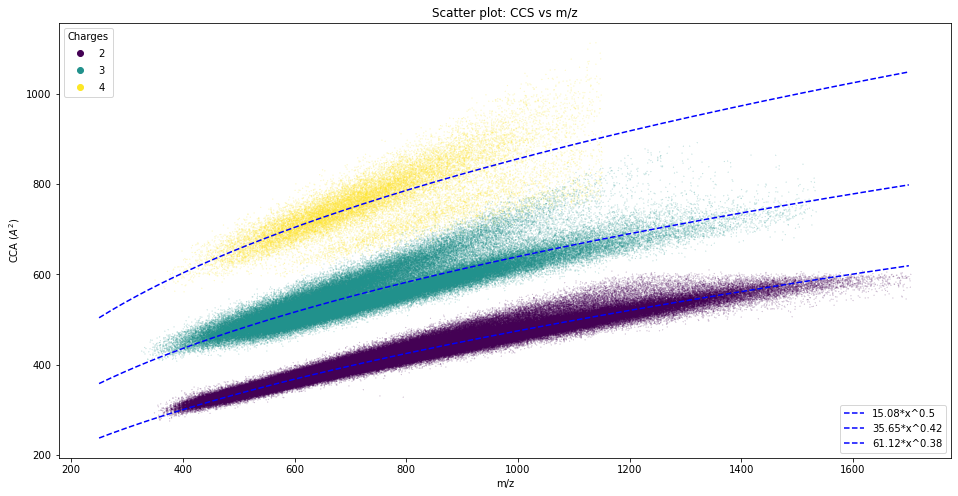

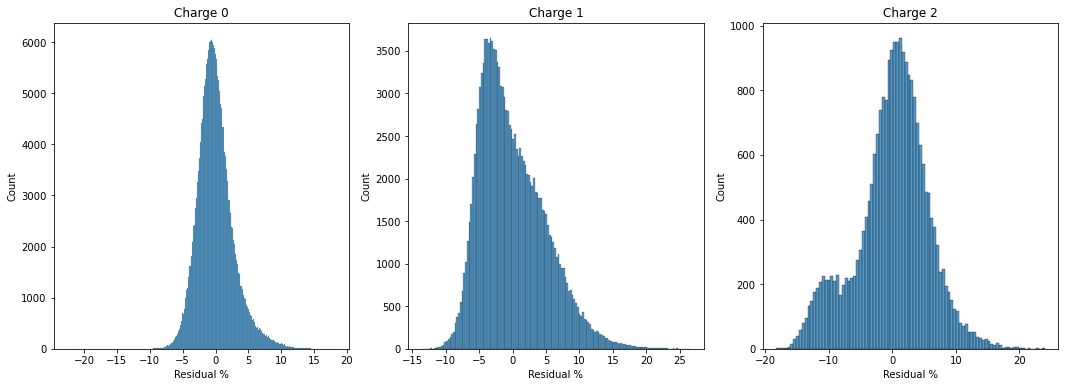

In [16]:
x_plot = np.linspace(250, 1700, 200)
fig = plt.gcf()
fig.set_size_inches((16, 8))
scatter = plt.scatter(df['m/z'], df['CCS'], c = df['Charge'], s = 0.01)
power2, = plt.plot(x_plot, f(x_plot, popt_2[0], popt_2[1]) , 'b--', label = 'fit charge 2')
power3, = plt.plot(x_plot, f(x_plot, popt_3[0], popt_3[1]) , 'b--', label = 'fit charge 3')
power4, = plt.plot(x_plot, f(x_plot, popt_4[0], popt_4[1]) , 'b--', label = 'fit charge 4')
plt.xlabel('m/z')
plt.ylabel(r'CCA ($A^2$)')
plt.title('Scatter plot: CCS vs m/z')
#plt.legend(*scatter.legend_elements(), title = 'Charges')
legend1 = plt.legend(*scatter.legend_elements(), title = 'Charges')
legend2 = plt.legend([power2, power3, power4], 
[f'{np.round(popt[0], 2)}*x^{np.round(popt[1], 2)}' for popt in [popt_2, popt_3, popt_4]], loc = 4)
plt.gca().add_artist(legend1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
i = 0
for ax, df_it, popt in zip(ax, [df_ch2, df_ch3, df_ch4],[popt_2, popt_3, popt_4]):
    sns.histplot((df_it['CCS']-f(df_it['m/z'], popt[0], popt[1]))/f(df_it['m/z'], popt[0], popt[1])*100, ax = ax)
    ax.set_xlabel('Residual %')
    ax.set_ylabel('Count')
    ax.set_title(f'Charge {i}')
    i += 1

Looks very simlar to before

##

## Results for all charges

In [17]:
df['predicted_ccs'] = 0

In [18]:
df.loc[df['Charge']==2,'predicted_ccs'] = f(df_ch2['m/z'], popt_2[0], popt_2[1])
df.loc[df['Charge']==3,'predicted_ccs'] = f(df_ch3['m/z'], popt_3[0], popt_3[1])
df.loc[df['Charge']==4,'predicted_ccs'] = f(df_ch4['m/z'], popt_4[0], popt_4[1])

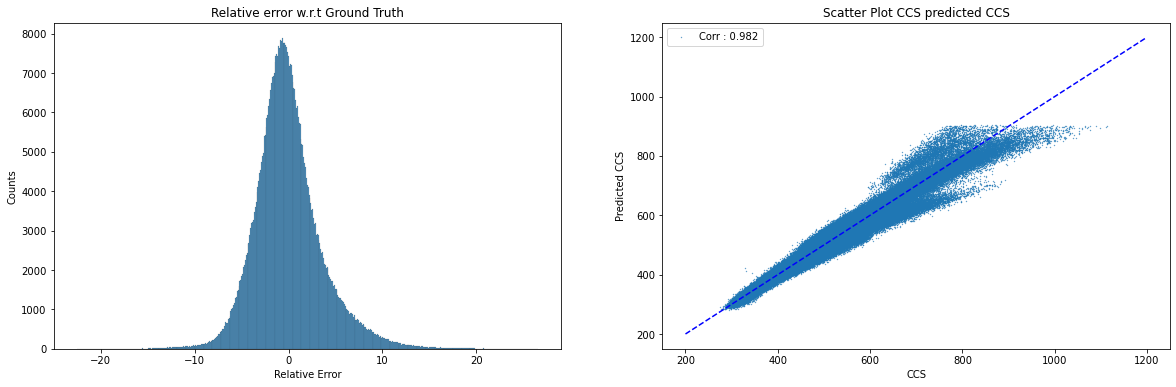

In [19]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
_ = sns.histplot((df['CCS'] - df['predicted_ccs'])/df['predicted_ccs']*100, ax = ax[0])
ax[0].set_xlabel('Relative Error')
ax[0].set_ylabel('Counts')
ax[0].set_title('Relative error w.r.t Ground Truth')

corr, _ = scipy.stats.pearsonr(df['CCS'],df['predicted_ccs'])
ax[1].scatter(df['CCS'], df['predicted_ccs'], label = f'Corr : {np.round(corr, 3)}', s = 0.1)
ax[1].set_xlabel('CCS')
ax[1].set_ylabel('Predicted CCS')
ax[1].set_title('Scatter Plot CCS predicted CCS')
ax[1].plot(np.arange(200,1200), np.arange(200,1200), 'b--')
ax[1].legend()

## Is the resisudal correlated with the m/z?

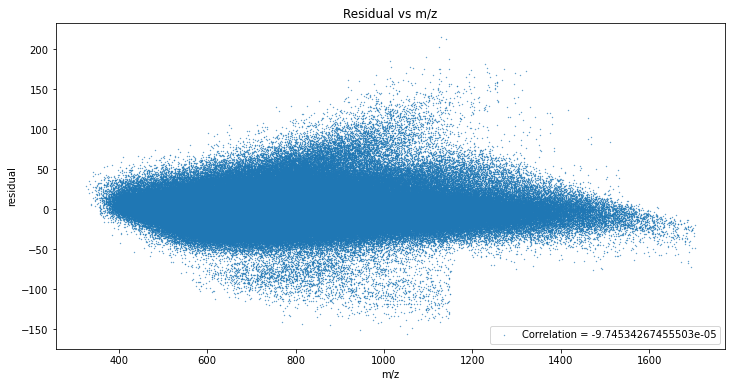

In [20]:
fig = plt.gcf()
fig.set_size_inches((12,6))
residual = df['CCS'] -  df['predicted_ccs']
corr, _ = scipy.stats.pearsonr(df['m/z'],residual)
plt.scatter(df['m/z'], residual, s = 0.1, label = f'Correlation = {corr}')
plt.xlabel('m/z')
plt.ylabel('residual')
plt.title('Residual vs m/z')
plt.legend(loc='lower right')

So the residual is not correlated to the m/z

## Linear Regression

In [21]:
f_lin = lambda x, a, b: a*x + b 

In [22]:
popt_2_lin, _ =scipy.optimize.curve_fit(f_lin, df_ch2['m/z'], df_ch2['CCS'])
popt_3_lin, _ =scipy.optimize.curve_fit(f_lin, df_ch3['m/z'], df_ch3['CCS'])
popt_4_lin, _ =scipy.optimize.curve_fit(f_lin, df_ch4['m/z'], df_ch4['CCS'])

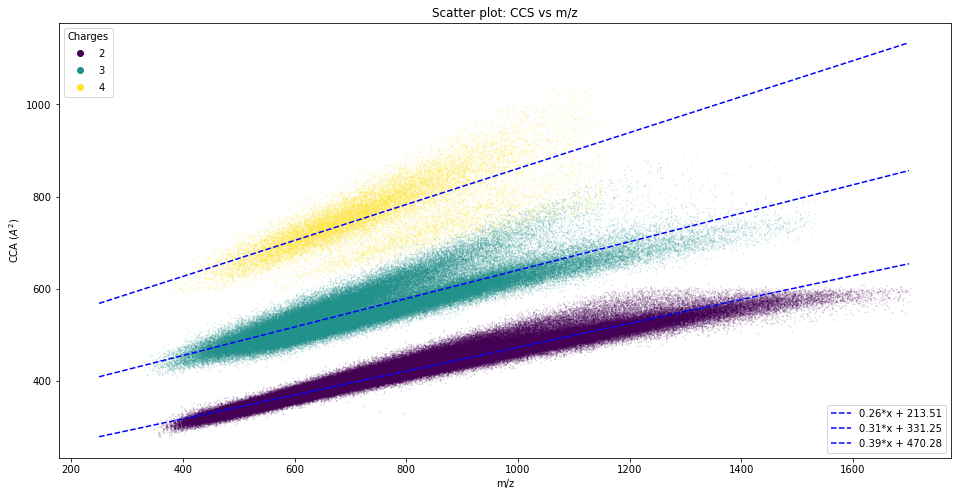

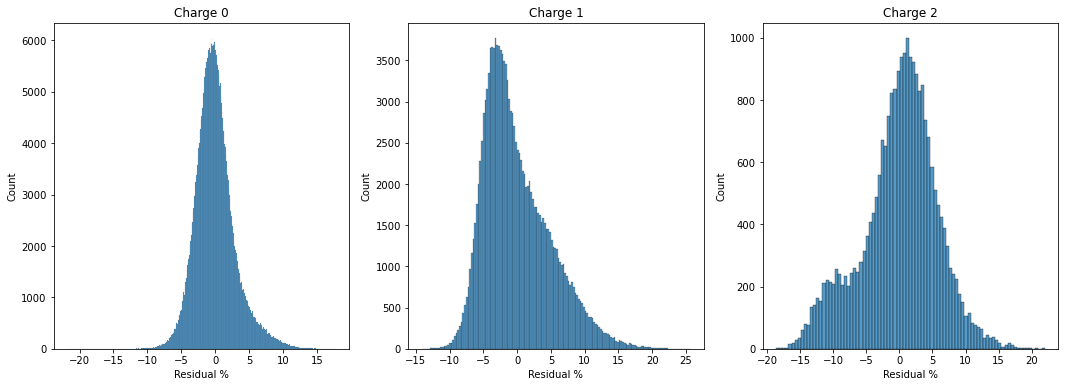

In [23]:
x_plot = np.linspace(250, 1700, 200)
fig = plt.gcf()
fig.set_size_inches((16, 8))
scatter = plt.scatter(df['m/z'], df['CCS'], c = df['Charge'], s = 0.01)
power2, = plt.plot(x_plot, f_lin(x_plot, popt_2_lin[0], popt_2_lin[1]) , 'b--', label = 'fit charge 2')
power3, = plt.plot(x_plot, f_lin(x_plot, popt_3_lin[0], popt_3_lin[1]) , 'b--', label = 'fit charge 3')
power4, = plt.plot(x_plot, f_lin(x_plot, popt_4_lin[0], popt_4_lin[1]) , 'b--', label = 'fit charge 4')
plt.xlabel('m/z')
plt.ylabel(r'CCA ($A^2$)')
plt.title('Scatter plot: CCS vs m/z')
#plt.legend(*scatter.legend_elements(), title = 'Charges')
legend1 = plt.legend(*scatter.legend_elements(), title = 'Charges')
legend2 = plt.legend([power2, power3, power4], 
[f'{np.round(popt[0], 2)}*x + {np.round(popt[1], 2)}' for popt in [popt_2_lin, popt_3_lin, popt_4_lin]], loc = 4)
plt.gca().add_artist(legend1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
i = 0
for ax, df_it, popt in zip(ax, [df_ch2, df_ch3, df_ch4],[popt_2_lin, popt_3_lin, popt_4_lin]):
    sns.histplot((df_it['CCS']-f_lin(df_it['m/z'], popt[0], popt[1]))/f_lin(df_it['m/z'], popt[0], popt[1])*100, ax = ax)
    ax.set_xlabel('Residual %')
    ax.set_ylabel('Count')
    ax.set_title(f'Charge {i}')
    i += 1

In [24]:
df['linear_ccs'] = 0

In [25]:
df.loc[df['Charge']==2,'linear_ccs'] = f_lin(df_ch2['m/z'], popt_2_lin[0], popt_2_lin[1])
df.loc[df['Charge']==3,'linear_ccs'] = f_lin(df_ch3['m/z'], popt_3_lin[0], popt_3_lin[1])
df.loc[df['Charge']==4,'linear_ccs'] = f_lin(df_ch4['m/z'], popt_4_lin[0], popt_4_lin[1])

In [26]:
df_ch2 = df[df['Charge']==2]
df_ch3 = df[df['Charge']==3]
df_ch4 = df[df['Charge']==4]

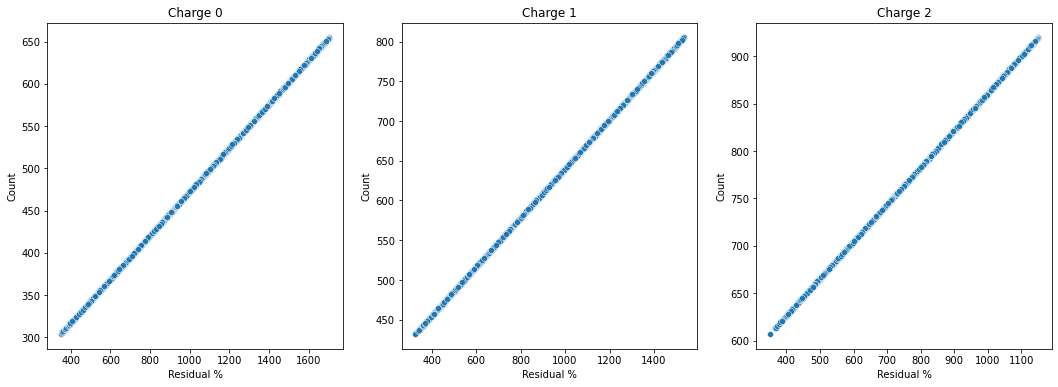

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
i = 0
for ax, df_it in zip(ax, [df_ch2, df_ch3, df_ch4]):
    sns.scatterplot(x = df_it['m/z'], y = df_it['linear_ccs'], ax = ax)
    ax.set_xlabel('Residual %')
    ax.set_ylabel('Count')
    ax.set_title(f'Charge {i}')
    i += 1

In [33]:
df.to_pickle('../Data/Fig1_powerlaw.pkl')

# Figure 4 

In [28]:
df_fig4 = pd.read_csv('./SourceData_Figure_4.csv', index_col = 0)

In [29]:
df_fig4['Mass'] = df_fig4['Modified_sequence'].apply(utils.calculate_mass)

In [30]:
df_fig4['m/z'] = df_fig4.apply(lambda x: utils.calculate_mass(x['Modified_sequence'], x['Charge']), axis = 1)

In [31]:
df_ch2_fig4 = df_fig4[df_fig4['Charge']==2]
df_ch3_fig4 = df_fig4[df_fig4['Charge']==3]
df_ch4_fig4 = df_fig4[df_fig4['Charge']==4]

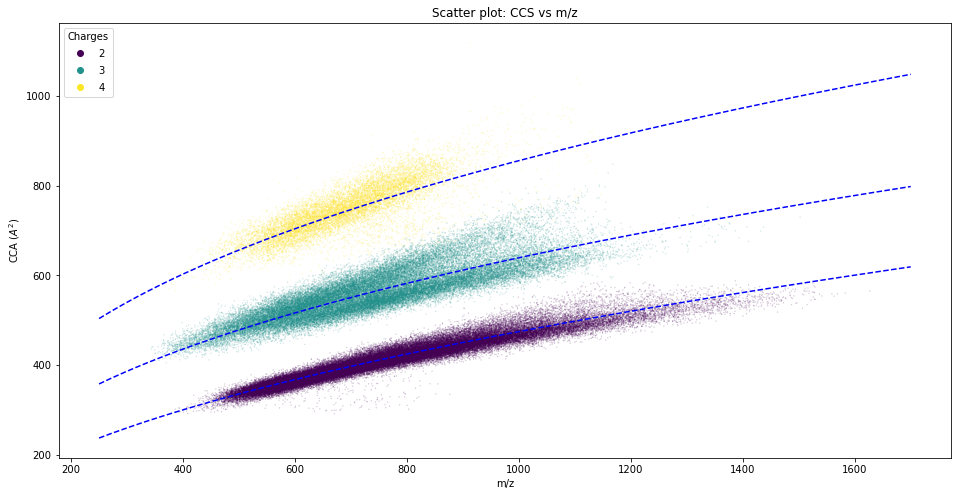

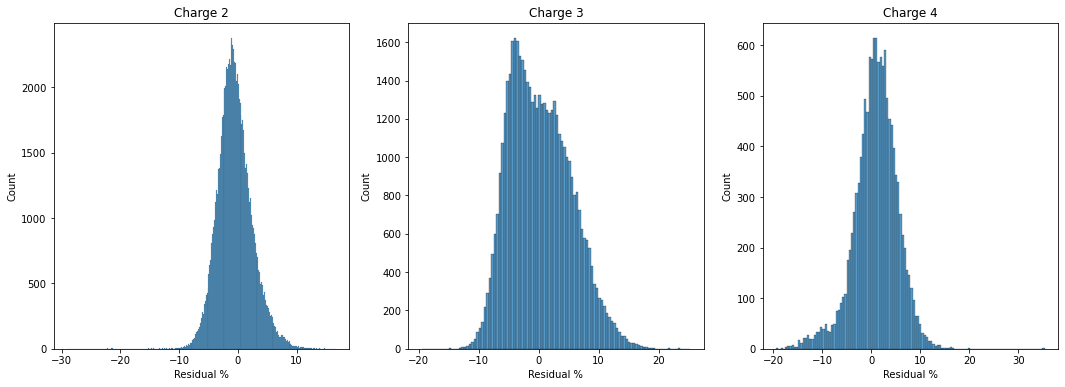

In [32]:
fig = plt.gcf()
fig.set_size_inches((16, 8))
scatter = plt.scatter(df_fig4['m/z'], df_fig4['CCS'], c = df_fig4['Charge'], s = 0.01)
power2 = plt.plot(x_plot, f(x_plot, popt_2[0], popt_2[1]) , 'b--', label = 'fit charge 2, train set params')
power3 = plt.plot(x_plot, f(x_plot, popt_3[0], popt_3[1]) , 'b--', label = 'fit charge 3, train set params')
power4 = plt.plot(x_plot, f(x_plot, popt_4[0], popt_4[1]) , 'b--', label = 'fit charge 4, train set params')
plt.xlabel('m/z')
plt.ylabel(r'CCA ($A^2$)')
plt.title('Scatter plot: CCS vs m/z')
plt.legend(*scatter.legend_elements(), title = 'Charges')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
i = 2
for ax, df_i, popt in zip(ax, [df_ch2_fig4, df_ch3_fig4, df_ch4_fig4],[popt_2, popt_3, popt_4]):
    sns.histplot((df_i['CCS']-f(df_i['m/z'], popt[0], popt[1]))/f(df_i['m/z'], popt[0], popt[1])*100, ax = ax)
    ax.set_xlabel('Residual %')
    ax.set_ylabel('Count')
    ax.set_title(f'Charge {i}')
    i += 1

In [33]:
for df_i, popt in zip([df_ch2_fig4, df_ch3_fig4, df_ch4_fig4],[popt_2, popt_3, popt_4]):
    df_i.loc[:,'Predicted CCS'] = f(df_i['m/z'], popt[0], popt[1])
    

/home/rlopez/miniconda3/envs/ccs/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/rlopez/miniconda3/envs/ccs/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [34]:
for df_i, popt in zip([df_ch2_fig4, df_ch3_fig4, df_ch4_fig4],[popt_2_lin, popt_3_lin, popt_4_lin]):
    df_i.loc[:,'linear_ccs'] = f_lin(df_i['m/z'], popt[0], popt[1])

In [35]:
predicted_ccs = df_ch2_fig4[['CCS','Predicted CCS', 'label Prediction 0', 'linear_ccs']].append(
    df_ch3_fig4[['CCS', 'Predicted CCS', 'label Prediction 0', 'linear_ccs']]).append(
        df_ch4_fig4[['CCS','Predicted CCS', 'label Prediction 0', 'linear_ccs']])

In [36]:
import scipy


Text(0.5, 0.98, 'Power law')

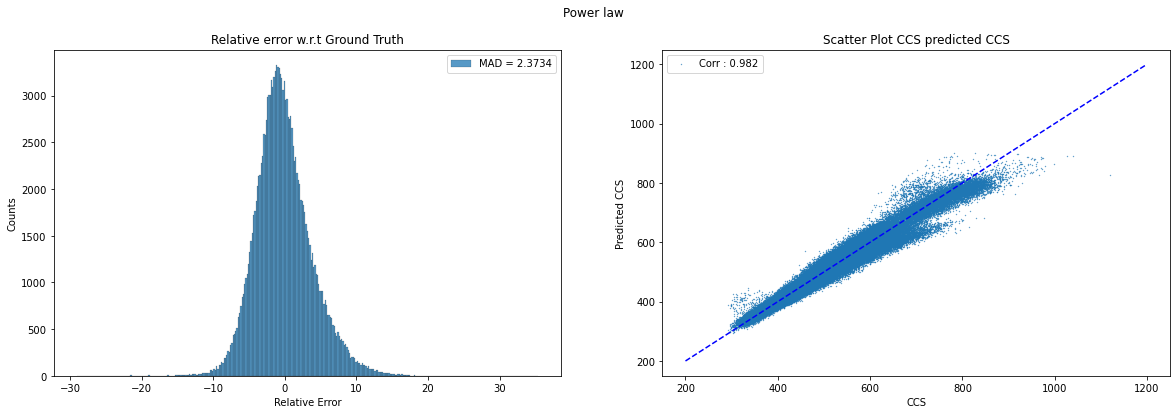

In [38]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
res_rel = (predicted_ccs['CCS'] - predicted_ccs['Predicted CCS'])/predicted_ccs['Predicted CCS']*100
_ = sns.histplot(res_rel, ax = ax[0], label = f'MAD = {np.round(scipy.stats.median_abs_deviation(res_rel), 4)}')
ax[0].set_xlabel('Relative Error')
ax[0].set_ylabel('Counts')
ax[0].set_title('Relative error w.r.t Ground Truth')
ax[0].legend()


corr, _ = scipy.stats.pearsonr(predicted_ccs['CCS'], predicted_ccs['Predicted CCS'])
ax[1].scatter(predicted_ccs['CCS'], predicted_ccs['Predicted CCS'], label = f'Corr : {np.round(corr, 3)}', s = 0.1)
ax[1].set_xlabel('CCS')
ax[1].set_ylabel('Predicted CCS')
ax[1].set_title('Scatter Plot CCS predicted CCS')
ax[1].plot(np.arange(200,1200), np.arange(200,1200), 'b--')
ax[1].legend()
fig.suptitle('Power law')



Text(0.5, 0.98, 'Linear Regression')

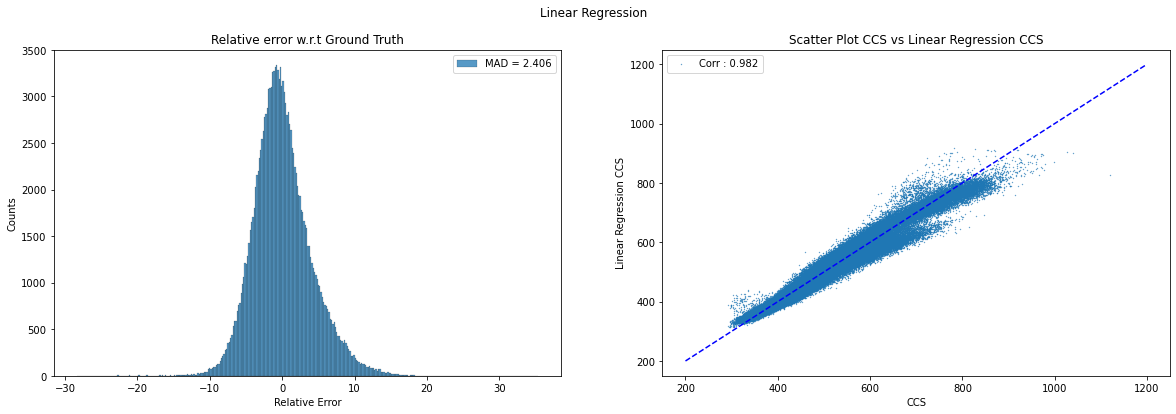

In [39]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
res_rel = (predicted_ccs['CCS'] - predicted_ccs['linear_ccs'])/predicted_ccs['linear_ccs']*100
_ = sns.histplot(res_rel, ax = ax[0], label = f'MAD = {np.round(scipy.stats.median_abs_deviation(res_rel), 4)}')
ax[0].set_xlabel('Relative Error')
ax[0].set_ylabel('Counts')
ax[0].set_title('Relative error w.r.t Ground Truth')
ax[0].legend()


corr, _ = scipy.stats.pearsonr(predicted_ccs['CCS'], predicted_ccs['linear_ccs'])
ax[1].scatter(predicted_ccs['CCS'], predicted_ccs['linear_ccs'], label = f'Corr : {np.round(corr, 3)}', s = 0.1)
ax[1].set_xlabel('CCS')
ax[1].set_ylabel('Linear Regression CCS')
ax[1].set_title('Scatter Plot CCS vs Linear Regression CCS')
ax[1].plot(np.arange(200,1200), np.arange(200,1200), 'b--')
ax[1].legend()
fig.suptitle('Linear Regression')

Text(0.5, 0.98, 'Linear Regression vs power law')

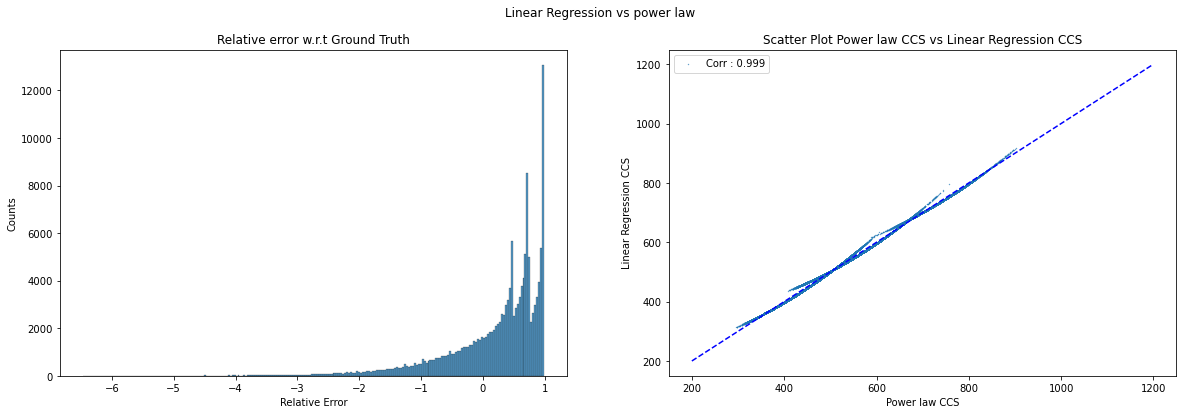

In [45]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
_ = sns.histplot((predicted_ccs['Predicted CCS'] - predicted_ccs['linear_ccs'])/predicted_ccs['linear_ccs']*100, ax = ax[0])
ax[0].set_xlabel('Relative Error')
ax[0].set_ylabel('Counts')
ax[0].set_title('Relative error w.r.t Ground Truth')

corr, _ = scipy.stats.pearsonr(predicted_ccs['Predicted CCS'], predicted_ccs['linear_ccs'])
ax[1].scatter(predicted_ccs['Predicted CCS'], predicted_ccs['linear_ccs'], label = f'Corr : {np.round(corr, 3)}', s = 0.1)
ax[1].set_xlabel('Power law CCS')
ax[1].set_ylabel('Linear Regression CCS')
ax[1].set_title('Scatter Plot Power law CCS vs Linear Regression CCS')
ax[1].plot(np.arange(200,1200), np.arange(200,1200), 'b--')
ax[1].legend()
fig.suptitle('Linear Regression vs power law')

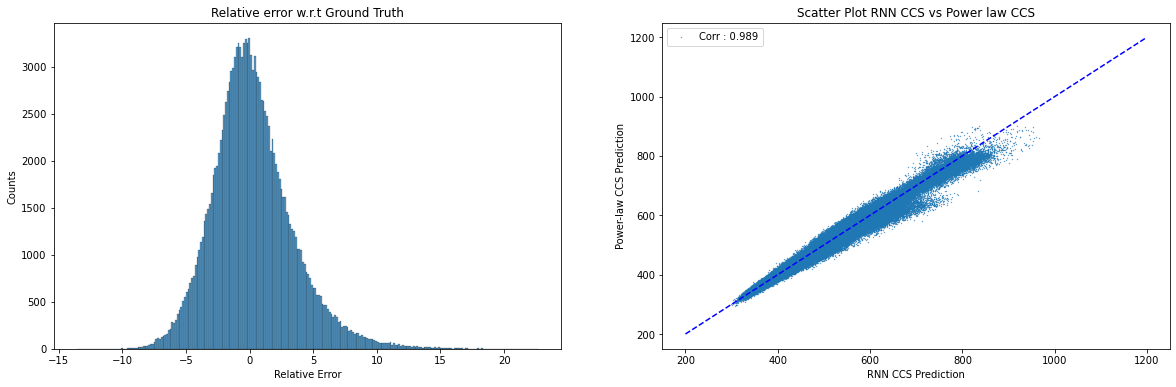

In [37]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
_ = sns.histplot((predicted_ccs['label Prediction 0'] - predicted_ccs['Predicted CCS'])/predicted_ccs['Predicted CCS']*100,
 ax = ax[0])
ax[0].set_xlabel('Relative Error')
ax[0].set_ylabel('Counts')
ax[0].set_title('Relative error w.r.t Ground Truth')

corr, _ = scipy.stats.pearsonr(predicted_ccs['label Prediction 0'], predicted_ccs['Predicted CCS'])
ax[1].scatter(predicted_ccs['label Prediction 0'], predicted_ccs['Predicted CCS'], label = f'Corr : {np.round(corr, 3)}', s = 0.1)
ax[1].set_xlabel('RNN CCS Prediction')
ax[1].set_ylabel('Power-law CCS Prediction')
ax[1].set_title('Scatter Plot RNN CCS vs Power law CCS')
ax[1].plot(np.arange(200,1200), np.arange(200,1200), 'b--')
plt.legend()

In [46]:
df_fig4['predicted_ccs'] = 0
df_fig4.loc[df_fig4['Charge']==2,'predicted_ccs'] = f(df_ch2_fig4['m/z'], popt_2[0], popt_2[1])
df_fig4.loc[df_fig4['Charge']==3,'predicted_ccs'] = f(df_ch3_fig4['m/z'], popt_3[0], popt_3[1])
df_fig4.loc[df_fig4['Charge']==4,'predicted_ccs'] = f(df_ch4_fig4['m/z'], popt_4[0], popt_4[1])

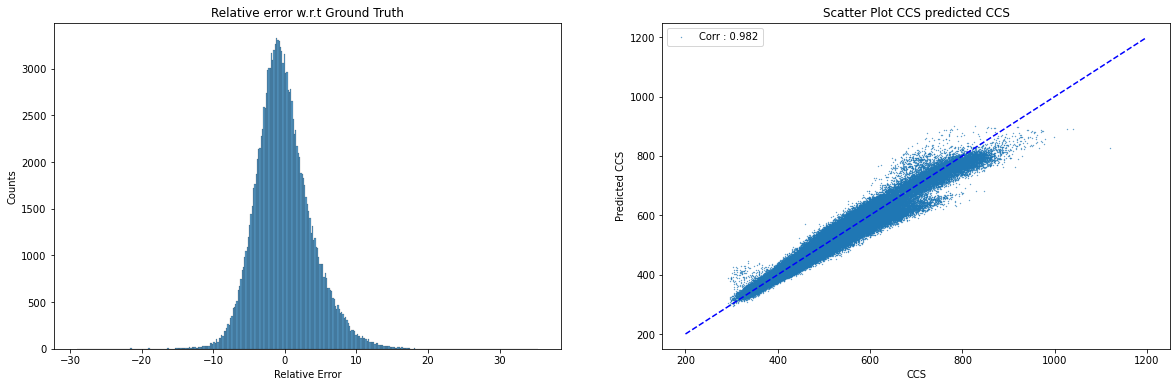

In [47]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
_ = sns.histplot((df_fig4['CCS'] - df_fig4['predicted_ccs'])/df_fig4['predicted_ccs']*100, ax = ax[0])
ax[0].set_xlabel('Relative Error')
ax[0].set_ylabel('Counts')
ax[0].set_title('Relative error w.r.t Ground Truth')

corr, _ = scipy.stats.pearsonr(df_fig4['CCS'],df_fig4['predicted_ccs'])
ax[1].scatter(df_fig4['CCS'], df_fig4['predicted_ccs'], label = f'Corr : {np.round(corr, 3)}', s = 0.1)
ax[1].set_xlabel('CCS')
ax[1].set_ylabel('Predicted CCS')
ax[1].set_title('Scatter Plot CCS predicted CCS')
ax[1].plot(np.arange(200,1200), np.arange(200,1200), 'b--')
ax[1].legend()

In [48]:
df_fig4['linear_ccs'] = 0
df_fig4.loc[df_fig4['Charge']==2,'linear_ccs'] = f_lin(df_ch2_fig4['m/z'], popt_2_lin[0], popt_2_lin[1])
df_fig4.loc[df_fig4['Charge']==3,'linear_ccs'] = f_lin(df_ch3_fig4['m/z'], popt_3_lin[0], popt_3_lin[1])
df_fig4.loc[df_fig4['Charge']==4,'linear_ccs'] = f_lin(df_ch4_fig4['m/z'], popt_4_lin[0], popt_4_lin[1])

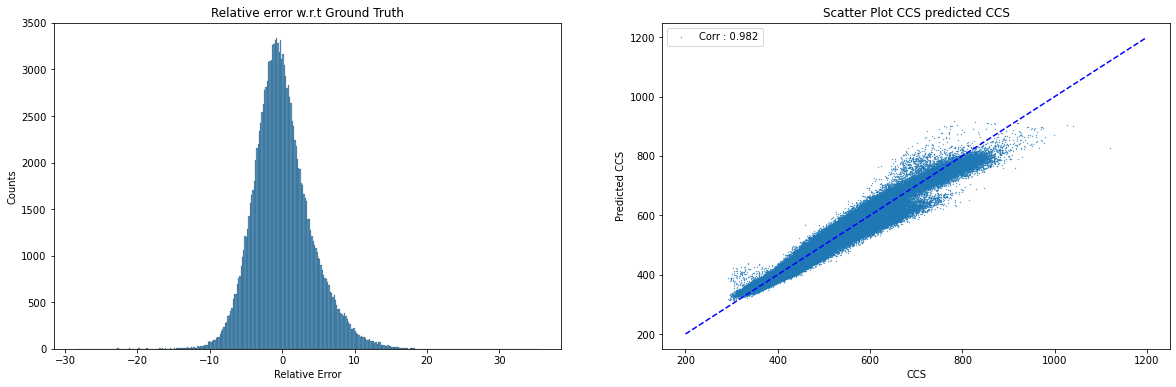

In [49]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
_ = sns.histplot((df_fig4['CCS'] - df_fig4['linear_ccs'])/df_fig4['linear_ccs']*100, ax = ax[0])
ax[0].set_xlabel('Relative Error')
ax[0].set_ylabel('Counts')
ax[0].set_title('Relative error w.r.t Ground Truth')

corr, _ = scipy.stats.pearsonr(df_fig4['CCS'],df_fig4['linear_ccs'])
ax[1].scatter(df_fig4['CCS'], df_fig4['linear_ccs'], label = f'Corr : {np.round(corr, 3)}', s = 0.1)
ax[1].set_xlabel('CCS')
ax[1].set_ylabel('Predicted CCS')
ax[1].set_title('Scatter Plot CCS predicted CCS')
ax[1].plot(np.arange(200,1200), np.arange(200,1200), 'b--')
ax[1].legend()

In [51]:
df_fig4_ch2 = df_fig4[df_fig4['Charge']==2]
df_fig4_ch3 = df_fig4[df_fig4['Charge']==3]
df_fig4_ch4 = df_fig4[df_fig4['Charge']==4]

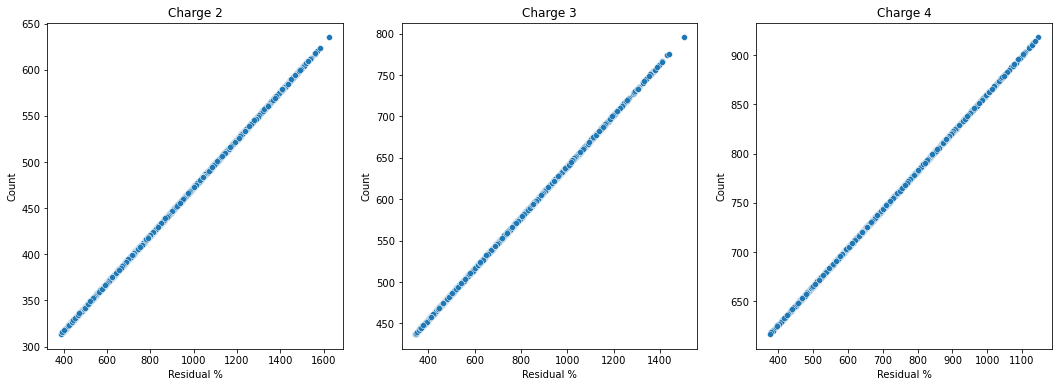

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
i = 0
for ax, df_it in zip(ax, [df_fig4_ch2, df_fig4_ch3, df_fig4_ch4]):
    sns.scatterplot(x = df_it['m/z'], y = df_it['linear_ccs'], ax = ax)
    ax.set_xlabel('Residual %')
    ax.set_ylabel('Count')
    ax.set_title(f'Charge {i+2}')
    i += 1

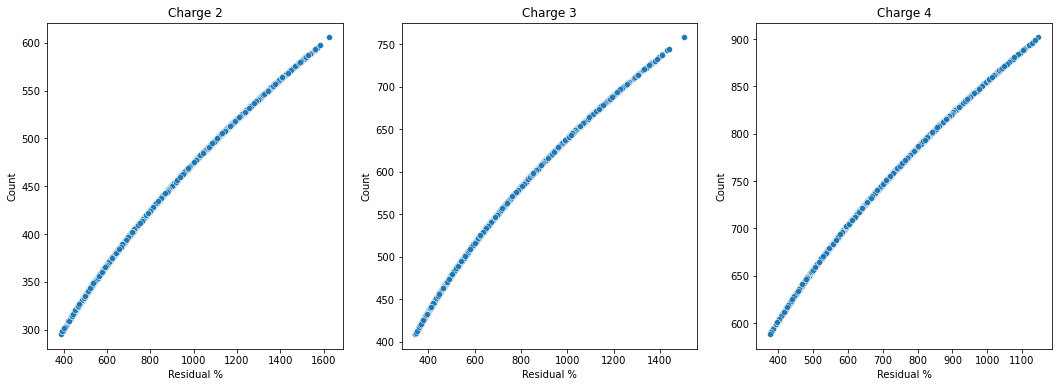

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
i = 0
for ax, df_it in zip(ax, [df_fig4_ch2, df_fig4_ch3, df_fig4_ch4]):
    sns.scatterplot(x = df_it['m/z'], y = df_it['predicted_ccs'], ax = ax)
    ax.set_xlabel('Residual %')
    ax.set_ylabel('Count')
    ax.set_title(f'Charge {i+2}')
    i += 1

In [54]:
df_fig4.to_pickle('../Data/Fig4_powerlaw.pkl')

# Is the residual correlated with m/z?

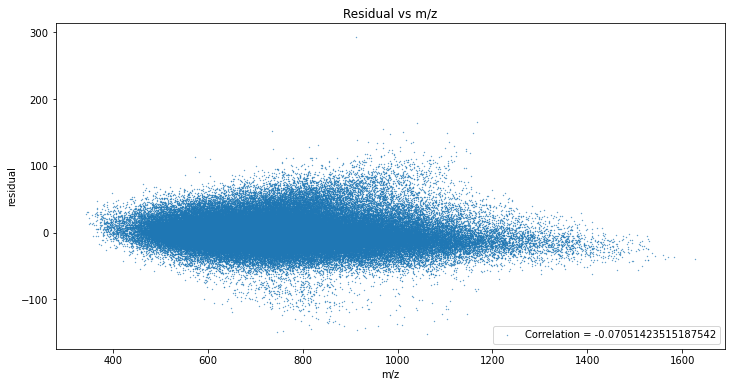

In [41]:
fig = plt.gcf()
fig.set_size_inches((12,6))
residual = df_fig4['CCS'] -  df_fig4['predicted_ccs']
corr, _ = scipy.stats.pearsonr(df_fig4['m/z'],residual)
plt.scatter(df_fig4['m/z'], residual, s = 0.1, label = f'Correlation = {corr}')
plt.xlabel('m/z')
plt.ylabel('residual')
plt.title('Residual vs m/z')
plt.legend(loc='lower right')

So the residual is not correalted with m/z